In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "Machine learning is an interesting field.",
    "Supervised learning is the main aspect of machine learning.",
    "The field of NLP is also related to machine learning."
]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключові слова:", sorted_keywords)

Ключові слова: ['interesting', 'an', 'field', 'machine', 'learning', 'is', 'to', 'the', 'supervised', 'related', 'of', 'nlp', 'main', 'aspect', 'also']


In [3]:
feature_names

array(['also', 'an', 'aspect', 'field', 'interesting', 'is', 'learning',
       'machine', 'main', 'nlp', 'of', 'related', 'supervised', 'the',
       'to'], dtype=object)

In [4]:
tfidf_scores

array([0.        , 0.52523431, 0.        , 0.39945423, 0.52523431,
       0.31021184, 0.31021184, 0.31021184, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [5]:
from sklearn.cluster import KMeans

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)

for cluster_id in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    print(f"Кластер {cluster_id + 1}:")
    for idx in cluster_indices:
        print(documents[idx])
    print("--------")

Кластер 1:
Supervised learning is the main aspect of machine learning.
--------
Кластер 2:
Machine learning is an interesting field.
The field of NLP is also related to machine learning.
--------


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

categories = ["технології", "спорт", "політика"]
labels = [0, 1, 2]

data = [...]

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність: {accuracy}")

ValueError: Found input variables with inconsistent numbers of samples: [1, 3]

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    words = word_tokenize(text.lower())  
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    return " ".join(filtered_words)

# Sample text
text = "Machine learning is an interesting field that many people are studying."
preprocessed_text = preprocess_text(text)
print("Processed:", preprocessed_text)

Processed: machine learning interesting field many people studying


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Roman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_and_lemmatize(text):
    doc = nlp(text.lower())
    lemmatized_words = [token.lemma_ for token in doc if token.text not in punctuation and token.text not in stop_words]
    return " ".join(lemmatized_words)

text = "Machine learning is an interesting field that many people are studying."
preprocessed_lemmatized_text = preprocess_and_lemmatize(text)
print("Processed:", preprocessed_lemmatized_text)

Processed: machine learning interesting field many people study


In [9]:
doc = nlp(text.lower())
for token in doc:
    print(
        f'{str(token.text_with_ws):22}'
        f'{str(token.is_alpha):22}'
        f'{str(token.is_punct):22}'
        f'{str(token.is_stop):22}'
    )

machine               True                  False                 False                 
learning              True                  False                 False                 
is                    True                  False                 True                  
an                    True                  False                 True                  
interesting           True                  False                 False                 
field                 True                  False                 False                 
that                  True                  False                 True                  
many                  True                  False                 True                  
people                True                  False                 False                 
are                   True                  False                 True                  
studying              True                  False                 False                 
.                    

In [10]:
SW = spacy.lang.en.stop_words.STOP_WORDS
list(SW)[:10]

['indeed',
 'on',
 'each',
 'even',
 'seemed',
 'over',
 'yet',
 'everyone',
 'whatever',
 'nobody']

In [11]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]

model = Word2Vec(sentences, min_count=1)

print(model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>


In [12]:
words = list(model.wv.index_to_key)
len(words), words

(14,
 ['sentence',
  'the',
  'is',
  'this',
  'final',
  'and',
  'more',
  'one',
  'another',
  'yet',
  'second',
  'word2vec',
  'for',
  'first'])

In [13]:
model.wv['sentence']

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [14]:
pca = PCA(n_components=2)
result = pca.fit_transform(model.wv[model.wv.index_to_key])
pca.explained_variance_ratio_.sum()

0.24096654

<function matplotlib.pyplot.show(close=None, block=None)>

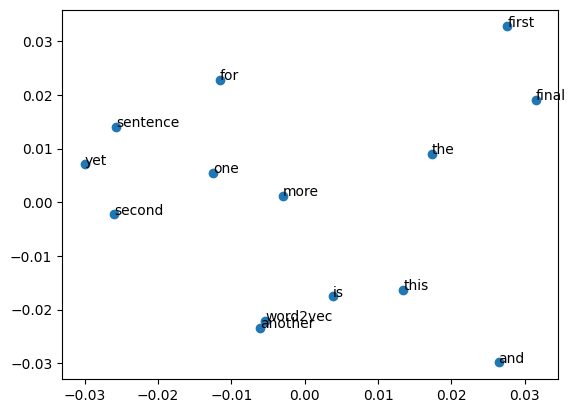

In [15]:
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show

## WOMAN + KING - MAN

In [16]:
# import gensim.downloader as api

# wv = api.load('word2vec-google-news-300')

In [17]:
# result = wv.most_similar(positive=['woman', 'king'], negative=['man'])
# print(result)